## Importing important libraries:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [3]:
train=pd.read_excel("Data_Train.xlsx",engine='openpyxl')
test=pd.read_excel("Test_set.xlsx",engine='openpyxl')

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### checking and droping missing values:

In [6]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [8]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


###### Converting "Date_of_Journey", "Dep_Time" and"Arrival_Time" columns into date-time format:

In [11]:
# train :
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"]).dt.month
train["Journey_day"] = pd.to_datetime(train["Date_of_Journey"]).dt.day

train["Dep_Time_hr"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_Time_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

train["Arrival_Time_hr"] = pd.to_datetime(train["Arrival_Time"]).dt.hour
train["Arrival_Time_min"] = pd.to_datetime(train["Arrival_Time"]).dt.minute

In [12]:
# test:
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"]).dt.month
test["Journey_day"] = pd.to_datetime(test["Date_of_Journey"]).dt.day

test["Dep_Time_hr"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_Time_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

test["Arrival_Time_hr"] = pd.to_datetime(test["Arrival_Time"]).dt.hour
test["Arrival_Time_min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute

#### Droping unimportant columns:



In [16]:
train.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)
test.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)

#### Using LabelEncoder to convert categorical data into numerical data 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

#train dataset

train["Source"] = le.fit_transform(train["Source"])
train["Destination"] = le.fit_transform(train["Destination"])

#test dataset

test["Source"] = le.fit_transform(test["Source"])
test["Destination"] = le.fit_transform(test["Destination"])

#### Number of types of flights:


In [24]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

#### Encoding the stops category into numbers:

In [27]:
stop = {
    "non-stop":0,
    "1 stop":1,
    "2 stops":2,
    "3 stops":3,
    "4 stops":4
}

train.loc[: , "Total_Stops"] = train["Total_Stops"].map(stop)    # For train dataset

test.loc[: , "Total_Stops"] = test["Total_Stops"].map(stop)  # For test dataset

In [29]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,0,5,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,3,0,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,2,1,19h,2,13882,9,6,9,25,4,25
3,IndiGo,3,0,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,0,5,4h 45m,1,13302,1,3,16,50,21,35


#### Changing duration in hr and min format

In [30]:
#train

duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [31]:
#test
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours_t = []
duration_mins_t = []
for i in range(len(duration)):
    duration_hours_t.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins_t.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [32]:
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [33]:
test["Duration_hours"] = duration_hours_t
test["Duration_mins"] = duration_mins_t

In [35]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,2h 50m,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,4h 45m,1,13302,1,3,16,50,21,35,4,45


In [36]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,Jet Airways,2,1,10h 55m,1,6,6,17,30,4,25,10,55
1,IndiGo,3,0,4h,1,12,5,6,20,10,20,4,0
2,Jet Airways,2,1,23h 45m,1,5,21,19,15,19,0,23,45
3,Multiple carriers,2,1,13h,1,5,21,8,0,21,0,13,0
4,Air Asia,0,2,2h 50m,0,6,24,23,55,2,45,2,50


In [37]:
train.drop(["Duration"] , axis =1 , inplace =True)
test.drop(["Duration"] , axis =1 , inplace =True)

In [39]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [40]:
stop={
    
    "Jet Airways":1,
    "IndiGo":2,
    "Air India":3,
    "Multiple carriers":4,
    "SpiceJet":5 ,
    "Vistara":6 ,
    "Air Asia":7 , 
    "GoAir":8,
}

train.loc[: , "Airline"] = train["Airline"].map(stop)
test.loc[: , "Airline"] = test["Airline"].map(stop)

In [42]:
train = train[train['Airline'] != 'Trujet']
train = train[train['Airline'] != 'Multiple carriers Premium economy']
train = train[train['Airline'] != 'Jet Airways Business']
train = train[train['Airline'] != 'Vistara Premium economy']



test = test[test['Airline'] != 'Multiple carriers Premium economy']
test = test[test['Airline'] != 'Jet Airways Business']
test = test[test['Airline'] != 'Vistara Premium economy']

In [48]:
train.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [49]:
test.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [44]:
train.dropna(inplace = True)
test.dropna(inplace = True)

### Seperate into input and target variables
### Apply train_test_split

In [52]:
x=train.drop(['Price'],axis=1)
y=train['Price']

In [55]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 100 , test_size = 0.2)

#### Feature Importance

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
feat = ExtraTreesRegressor()
feat.fit(x_train , y_train)

ExtraTreesRegressor()

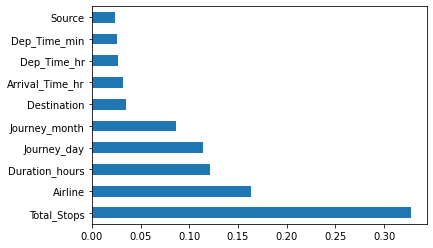

In [58]:
features = pd.Series( feat.feature_importances_ , index = x_train.columns )
features.nlargest(10).plot(kind = "barh")
plt.show()

In [59]:
## importance of every attributes

### Model Creation

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [61]:
lr = LinearRegression()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [65]:
print(lr.fit(x_train , y_train))
print(xgb.fit(x_train , y_train))
print(rfr.fit(x_train , y_train))
print(dt.fit(x_train , y_train))

LinearRegression()
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
RandomForestRegressor()
DecisionTreeRegressor()


### Training Acccuracy

In [66]:
from sklearn.metrics import r2_score

In [67]:
print(r2_score(lr.predict(x_train) , y_train))
print(r2_score(xgb.predict(x_train) , y_train))
print(r2_score(rfr.predict(x_train) , y_train))
print(r2_score(dt.predict(x_train) , y_train))

-0.0723870398904618
0.928049819876814
0.9488043195515438
0.9665767652632145


In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
print(mean_squared_error(lr.predict(x_train) , y_train))
print(mean_squared_error(xgb.predict(x_train) , y_train))
print(mean_squared_error(rfr.predict(x_train) , y_train))
print(mean_squared_error(dt.predict(x_train) , y_train))

10128480.059569594
1266204.9099917256
908690.3038249342
633043.925407529


#### checking distribution on the train dataset

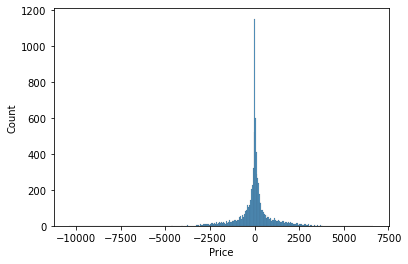

In [73]:
sns.histplot(rfr.predict(x_train) - y_train)
plt.show()

#### #checking distribution on the test dataset

<AxesSubplot:xlabel='Price', ylabel='Count'>

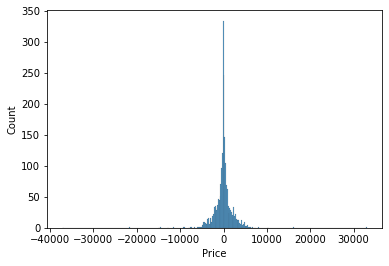

In [75]:
sns.histplot(rfr.predict(x_test) - y_test)


### Hyperparameter Tuning 

In [76]:
rf_p = {
    
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200)),
    "n_estimators": list(range(1,500))
}

dt_p = {
    "criterion":["mse"],
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200))
}

xgb_p = {
    "learning_rate" : [0.1,0.2,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.5],
    "max_depth" : list(range(1,200)),
    "booster" : ['gbtree', 'gblinear' ,'dart'],
    "min_child_weight" : list(range(1,20)),
    "n_estimators" : list(range(1,200))
}

In [78]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(rfr , param_distributions=rf_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [79]:
rscv.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 

In [80]:
# taking best parameters
rscv.best_estimator_

RandomForestRegressor(max_depth=92, min_samples_leaf=6, min_samples_split=3,
                      n_estimators=433)

In [81]:
rfr =RandomForestRegressor(max_depth=92, min_samples_leaf=6, min_samples_split=3,
                      n_estimators=433)

In [82]:
rfr.fit(x_train , y_train)
xgb.fit(x_train , y_train)
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [83]:
print(r2_score(rfr.predict(x_test) , y_test))
print(r2_score(xgb.predict(x_test) , y_test))
print(r2_score(dt.predict(x_test) , y_test))

0.7566056725261824
0.7475949679023756
0.6341130248953321


#### Model Saving 

In [86]:
import pickle

In [87]:
with open('RFR_model.pkl', 'wb') as file:
    pickle.dump(rfr, file)